In [10]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('final_data.csv')

In [3]:
df.dropna(inplace = True)

In [4]:
df.shape

(10754, 22)

In [5]:
df.dtypes

player                  object
team                    object
name                    object
position                object
height                 float64
age                    float64
appearance               int64
goals                  float64
assists                float64
yellow cards           float64
second yellow cards    float64
red cards              float64
goals conceded         float64
clean sheets           float64
minutes played           int64
days_injured             int64
games_injured            int64
award                    int64
current_value            int64
highest_value            int64
position_encoded         int64
winger                   int64
dtype: object

In [6]:
df.drop(columns = ['player', 'team', 'name'], inplace = True)

In [7]:
df_encoded = pd.get_dummies(df, columns= ['position'])

In [8]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_encoded)

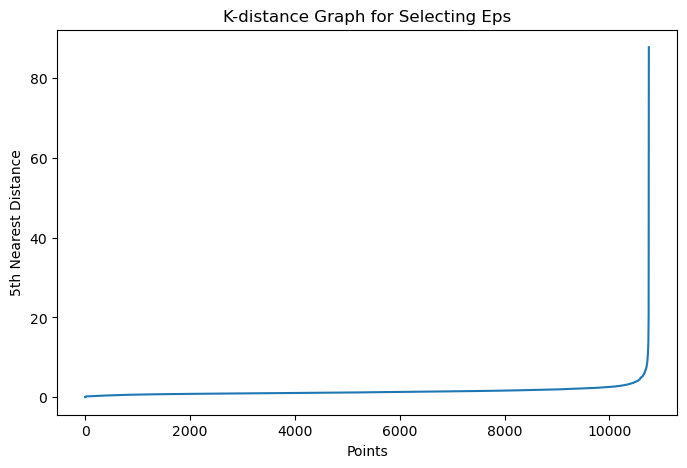

Silhouette Score: -0.4414577810153249


In [11]:
neigh = NearestNeighbors(n_neighbors=5)  
neigh.fit(df_scaled)
distances, indices = neigh.kneighbors(df_scaled)

distances = np.sort(distances[:, 4], axis=0) 
plt.figure(figsize=(8, 5))
plt.plot(distances)
plt.xlabel('Points')
plt.ylabel('5th Nearest Distance')
plt.title('K-distance Graph for Selecting Eps')
plt.show()

dbscan = DBSCAN(eps=0.5, min_samples=5)  
dbscan.fit(df_scaled)

labels = dbscan.labels_
if len(set(labels)) > 1: 
    silhouette_avg = silhouette_score(df_scaled, labels)
    print(f'Silhouette Score: {silhouette_avg}')
else:
    print("DBSCAN resulted in a single cluster, try adjusting parameters.")
